# A SIMPLE CONVOLUTIONAL NEURAL NETWORK FROM SCRATCH

_**Building a Simple Convolutional Neural Network (CNN) from Scratch on MNIST dataset.**_

**The Experiment:**
- Load MNIST dataset containing of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.
- Scales the data to keep the range of pixel values between 0 and 1.
- Split the data into train, validation and test set
- Change the dimension of each of the data set to feed into the neural network.
- Apply one-hot-encoding to labels for model to compare with its output.
- Create an appropriate convolutional neural network.
- Train the model with checkpoint and early stopping and measure performance over validation data during traning.
- Analyze the learning curve and evaluate model's performance on the test set. 

## Importing Packages

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

2026-01-05 03:47:18.958013: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-05 03:47:19.005723: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-05 03:47:19.779593: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


## Data Acquisition & Analysis

In [2]:
# Loads MNIST dataset
# NOTE: Downloading for the first time may take few minutes to complete

(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# Checks the shape of the datasets

print("Full training set shape:",X_train_full.shape) # Code to check the train set shape)
print("Test set shape:",X_test.shape) # Code to check the test set shape)

Full training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


In [4]:
# Checks the type of the array
X_train_full.dtype

dtype('uint8')

## Data Preprocessing

In [5]:
# As with dtype 'uint8', the data can range from 0 to 255, transform the data 
# (by dividing the values by 255.) to fit within a specific range like between 0 and 1,
# for effective neural network model training

X_train_full= X_train_full / 255.
X_test = X_test / 255. # Code here

In [6]:
# Seperate out 5000 instances from train set stratifically to be used as validation set

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=5000, random_state=42, stratify=y_train_full)
    # Code here)

In [7]:
# To match the input shape requirement of the CNN model, 
# add channel as third (and last) dimention to each dataset
# Use np.expand_dim method and -1 to indicate last axis

X_train =np.expand_dims(X_train, axis=-1)# Code here
X_val =np.expand_dims(X_val, axis=-1)# Code here
X_test = np.expand_dims(X_test, axis=-1)# Code here

In [8]:
# Checks for the updated shape
X_train.shape

(55000, 28, 28, 1)

In [9]:
# Convert class vectors for each of the datasets to binary class matrices 
# (one-hot encoding) calling `tf.keras.utils.to_categorical` method
# passing the dataset and distinct classes in the dataset.

num_classes = 10

y_train = tf.keras.utils.to_categorical(y_train, num_classes)# Code here
y_val =tf.keras.utils.to_categorical(y_val,num_classes) # Code here
y_test = tf.keras.utils.to_categorical(y_test, num_classes) # Code here

In [10]:
# Checks for the updated shape
y_train.shape

(55000, 10)

## Modeling

In [11]:
# Sets the global random seed for operations that rely on a random seed
tf.random.set_seed(42)

# Create a list of the following layers and pass it to `tf.keras.Sequential` to
# initialize the CNN model.
# Note all the layers could be access through module `tf.keras.layers`
# 2. `Conv2D` layer with 32 filters, `kernel_size` of (3, 3) and "rely" `activation`
# 3. `MaxPooling2D` layer with `pool_size` of (2, 2)
# 4. `Conv2D` layer with 64 filters, `kernel_size` of (3, 3) and "rely" `activation`
# 5. `MaxPooling2D` layer with `pool_size` of (2, 2)
# 6. `Flatten` layer
# 7. `Dropout` layer with 0.5 dropout rate
# 8. `Dense` layer with 10 output unit and "softmax" as `activation`


model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation="softmax"),
])

2026-01-05 03:47:20.649120: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [12]:
# Shows the model summary
model.summary(show_trainable=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ conv2d (Conv2D)             │ (None, 26, 26, 32)    │        320 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ max_pooling2d               │ (None, 13, 13, 32)    │          0 │   -   │
│ (MaxPooling2D)              │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ conv2d_1 (Conv2D)           │ (None, 11, 11, 64)    │     18,496 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ max_pooling2d_1             │ (None, 5, 5, 64)      │          0 │   -   │
│ (MaxPooling2D)              │                       │            │       │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ flatten (Flatten)           │ (None, 1600)          │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dropout (Dropout)           │ (None, 1600)          │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense (Dense)               │ (None, 10)            │     16,010 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model

In [13]:
# Code to compile the model with `categorical_crossentropy` as `loss`, 
# `adam` as `optimizer` and `["accuracy"]` as `metrics`
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
# Call `fit` metho of the model passing 
# train set (features and labels seperated by comma), 64 to `batch_size`, 
# 50 to `epochs`, configured callback to `callbacks` and 
# validation data (features and labels seperated by comma) to `validation_data`

history =  model.fit(X_train, y_train, 
                    batch_size=64,
                    epochs=50,
                    callbacks=[
                        tf.keras.callbacks.ModelCheckpoint("./models/mnist/checkpoints/mnist.weights.keras", save_best_only=True),
                        tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
                    ],
                    validation_data=(X_val, y_val))# Code here

Epoch 1/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9182 - loss: 0.2705 - val_accuracy: 0.9686 - val_loss: 0.1101
Epoch 2/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9701 - loss: 0.0969 - val_accuracy: 0.9814 - val_loss: 0.0681
Epoch 3/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9760 - loss: 0.0771 - val_accuracy: 0.9832 - val_loss: 0.0565
Epoch 4/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9798 - loss: 0.0629 - val_accuracy: 0.9874 - val_loss: 0.0480
Epoch 5/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9833 - loss: 0.0555 - val_accuracy: 0.9866 - val_loss: 0.0490
Epoch 6/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9844 - loss: 0.0499 - val_accuracy: 0.9868 - val_loss: 0.0456
Epoch 7/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9849 - loss: 0.0470 - val_accuracy: 0.9884 - val_loss: 0.0404
Epoch 8/50
860/860 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9873 - loss: 0.0415 - val_accuracy: 0.

In [19]:
# Saves the trained model for later reference
# NOTE: Make sure the folder "models" exists under the current working directory

model.save("./models/mnist/mnist.keras")

## Model Evaluation
Visualizes the learning progress over train and validation set

Text(0.5, 0.98, 'Learning Curves')

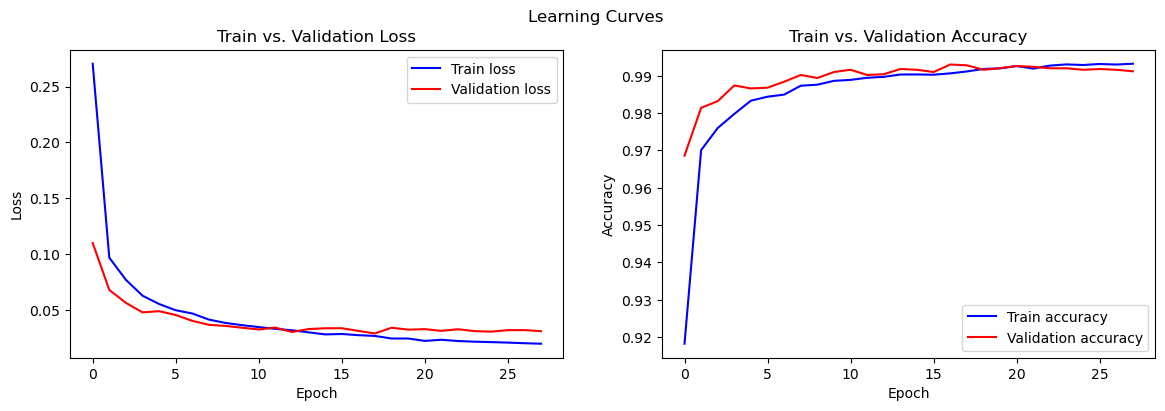

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(14,4))

ax1.plot(history.history["loss"], "b-", label="Train loss")
ax1.plot(history.history["val_loss"], "r-", label="Validation loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
ax1.set_title("Train vs. Validation Loss")

ax2.plot(history.history["accuracy"], "b-", label="Train accuracy")
ax2.plot(history.history["val_accuracy"], "r-", label="Validation accuracy")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend()
ax2.set_title("Train vs. Validation Accuracy")

fig.suptitle("Learning Curves")

In [21]:
print(f"Model was its best (lowest validation loss) at epoch {np.argmin(history.history["val_loss"]) + 1}")

Model was its best (lowest validation loss) at epoch 18


In [22]:
# Evaluates the model on test set
model_test_performance = model.evaluate(X_test, y_test)

print(f"Test Performance: \
      Loss: {model_test_performance[1]:.2f}, Accuracy: {model_test_performance[1]*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9937 - loss: 0.0222
Test Performance:       Loss: 0.99, Accuracy: 99.37%


**Observations:**

- Did the model overfit? Write observations on this.

- At the end of which epoch the model was its best (on validation loss)?

- Was the training stopped early? If so, it stopped at which epoch and why?

- How was the test performance?